<a href="https://colab.research.google.com/github/24jagruti11/brainhack_final_project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import os
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ptseries')

MessageError: ignored

In [ ]:
aparc_corZ_df = np.empty((75,392,392))
aparc_corZ_df[:] = np.nan

In [ ]:
data = pd.read_csv('participants.csv')

print(data)

   participant_id   age     sex     iq group  subjects data
0          sub-01  47.0    male   81.0    HC         1    y
1          sub-02  36.0    male  104.0    HC         2    y
2          sub-03  43.0    male  108.0    HC         3    y
3          sub-04  25.0    male  106.0    HC         4    y
4          sub-05   NaN     NaN    NaN   NaN         5    n
..            ...   ...     ...    ...   ...       ...  ...
70         sub-71  66.0  female   98.0  AVH+        71    y
71         sub-72  64.0    male   89.0  AVH+        72    y
72         sub-73  20.0  female   73.0  AVH+        73    y
73         sub-74  42.0    male  114.0  AVH+        74    y
74         sub-75  32.0    male   98.0  AVH+        75    y

[75 rows x 7 columns]


In [ ]:
data = data[data['data'] == 'y'] 
print(data)

   participant_id   age     sex     iq group  subjects data
0          sub-01  47.0    male   81.0    HC         1    y
1          sub-02  36.0    male  104.0    HC         2    y
2          sub-03  43.0    male  108.0    HC         3    y
3          sub-04  25.0    male  106.0    HC         4    y
6          sub-07  38.0  female  100.0    HC         7    y
..            ...   ...     ...    ...   ...       ...  ...
70         sub-71  66.0  female   98.0  AVH+        71    y
71         sub-72  64.0    male   89.0  AVH+        72    y
72         sub-73  20.0  female   73.0  AVH+        73    y
73         sub-74  42.0    male  114.0  AVH+        74    y
74         sub-75  32.0    male   98.0  AVH+        75    y

[67 rows x 7 columns]


In [ ]:
for subj in data.subjects:


    # construct file name
    filename = 'sub-%02d/func/sub-%02d_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii' % (subj,subj)
    print('Subj %d : %s' % (subj,filename))

    aparc_ptseries_nib = nib.load(filename)

    ## now that it has been loaded we can get the data from within it using the get_fdata() method
    aparc_ptseries_data = aparc_ptseries_nib.get_fdata()

    aparc_parcels = aparc_ptseries_nib.header.get_axis(1).name
    aparc_ptseries_df = pd.DataFrame(aparc_ptseries_data, columns=aparc_parcels)

    aparc_cor_df = aparc_ptseries_df.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    aparc_corZ_df[subj-1,:,:] = np.arctanh(aparc_cor_df).values ## the Fisher's r-to-z transform - we usually do this before stats 

Subj 1 : sub-01/func/sub-01_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 2 : sub-02/func/sub-02_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 3 : sub-03/func/sub-03_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 4 : sub-04/func/sub-04_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 7 : sub-07/func/sub-07_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 8 : sub-08/func/sub-08_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 9 : sub-09/func/sub-09_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 10 : sub-10/func/sub-10_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 11 : sub-11/func/sub-11_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 12 : sub-12/func/sub-12_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 13 : sub-13/func/sub-13_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 14 : sub-14/func/sub-14_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 15 : sub-15/func/sub-15_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 16 : sub-16/func/sub-16_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 17 : sub-17/func/sub-17_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 18 : sub-18/func/sub-18_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 19 : sub-19/func/sub-19_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 20 : sub-20/func/sub-20_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 21 : sub-21/func/sub-21_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 22 : sub-22/func/sub-22_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 23 : sub-23/func/sub-23_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 24 : sub-24/func/sub-24_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 25 : sub-25/func/sub-25_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 26 : sub-26/func/sub-26_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 27 : sub-27/func/sub-27_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 28 : sub-28/func/sub-28_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 29 : sub-29/func/sub-29_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 30 : sub-30/func/sub-30_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 32 : sub-32/func/sub-32_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 33 : sub-33/func/sub-33_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 34 : sub-34/func/sub-34_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 36 : sub-36/func/sub-36_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 37 : sub-37/func/sub-37_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 38 : sub-38/func/sub-38_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 40 : sub-40/func/sub-40_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 42 : sub-42/func/sub-42_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 43 : sub-43/func/sub-43_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 44 : sub-44/func/sub-44_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 45 : sub-45/func/sub-45_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 46 : sub-46/func/sub-46_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 47 : sub-47/func/sub-47_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 48 : sub-48/func/sub-48_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 49 : sub-49/func/sub-49_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 50 : sub-50/func/sub-50_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 53 : sub-53/func/sub-53_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 54 : sub-54/func/sub-54_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 55 : sub-55/func/sub-55_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 56 : sub-56/func/sub-56_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 57 : sub-57/func/sub-57_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 58 : sub-58/func/sub-58_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 59 : sub-59/func/sub-59_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 60 : sub-60/func/sub-60_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 61 : sub-61/func/sub-61_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 62 : sub-62/func/sub-62_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 63 : sub-63/func/sub-63_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 64 : sub-64/func/sub-64_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 65 : sub-65/func/sub-65_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 66 : sub-66/func/sub-66_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 67 : sub-67/func/sub-67_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 68 : sub-68/func/sub-68_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 69 : sub-69/func/sub-69_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 70 : sub-70/func/sub-70_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 71 : sub-71/func/sub-71_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 72 : sub-72/func/sub-72_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 73 : sub-73/func/sub-73_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 74 : sub-74/func/sub-74_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


Subj 75 : sub-75/func/sub-75_task-speech_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


In [ ]:
# could use .any or np.any()
print(np.isnan(aparc_corZ_df).any())


<built-in method any of numpy.ndarray object at 0x7feff31af990>


In [ ]:
#aparc_corZ_df[np.isnan(slice).all() == False].shape
nan_index_list = []

for slice in aparc_corZ_df:
  nan = np.isnan(slice).all()
  #print(nan)
  nan_index_list.append(nan)
  #np.append(nan_index_list, nan)

nan_index_list = np.invert(nan_index_list)
print(nan_index_list)

[ True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [ ]:
aparc_corZ_df_subset = aparc_corZ_df[nan_index_list]
print(aparc_corZ_df_subset)

[[[        inf  0.32255187  0.15193482 ...  0.16071299 -0.05673696
    0.20143603]
  [ 0.32255187         inf -0.15097893 ... -0.10863969  0.32809016
    0.24119626]
  [ 0.15193482 -0.15097893         inf ...  0.01618997 -0.06972734
    0.13062049]
  ...
  [ 0.16071299 -0.10863969  0.01618997 ...         inf -0.08499283
    0.05280606]
  [-0.05673696  0.32809016 -0.06972734 ... -0.08499283         inf
    0.36968227]
  [ 0.20143603  0.24119626  0.13062049 ...  0.05280606  0.36968227
           inf]]

 [[        inf  0.4203699   0.23375665 ... -0.00160442  0.124289
    0.12394787]
  [ 0.4203699          inf  0.17093777 ...  0.14520114  0.17682658
    0.18584184]
  [ 0.23375665  0.17093777         inf ...  0.12411369 -0.03376539
   -0.05927843]
  ...
  [-0.00160442  0.14520114  0.12411369 ...         inf  0.29082964
    0.31944286]
  [ 0.124289    0.17682658 -0.03376539 ...  0.29082964         inf
    0.46591356]
  [ 0.12394787  0.18584184 -0.05927843 ...  0.31944286  0.46591356
        

In [ ]:
aparc_corZ_df_subset.shape

(67, 392, 392)

In [ ]:
aparc_corZ_reshape  = aparc_corZ_df_subset.reshape(67,-1)
aparc_corZ_reshape.shape
print(aparc_corZ_reshape)

[[        inf  0.32255187  0.15193482 ...  0.05280606  0.36968227
          inf]
 [        inf  0.4203699   0.23375665 ...  0.31944286  0.46591356
          inf]
 [        inf  0.24646112  0.15490028 ... -0.02163903  0.65920317
          inf]
 ...
 [        inf  0.50902669  0.35106998 ... -0.21582656  0.43313417
          inf]
 [        inf  0.49190185  0.51012512 ...  0.02006143  0.40304736
          inf]
 [        inf  0.52434854  0.25227537 ...  0.02934865  0.62750626
          inf]]


In [ ]:
aparc_corZ_reshape[~np.isfinite(aparc_corZ_reshape)] = 0

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import permutation_test_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import random

In [ ]:
aparc_corZ_std = StandardScaler().fit_transform(aparc_corZ_reshape)
aparc_corZ_std.shape

(67, 153664)

In [ ]:
pca = PCA()
aparc_corZ_pca = pca.fit_transform(aparc_corZ_std)

In [ ]:
print(aparc_corZ_pca)

[[ 3.60777931e+01 -9.79274244e+01  2.84045408e+01 ... -2.65730928e+01
  -2.22522750e+00  8.80648514e-14]
 [ 1.74851471e+01  6.79714776e+01  1.38133727e+02 ... -8.58160059e+00
  -1.78945939e+01  8.80648514e-14]
 [ 2.42726355e+01  2.93722988e+01 -3.74694465e+01 ... -3.13012279e+01
  -6.54558426e+00  8.80648514e-14]
 ...
 [ 3.82920658e+01 -7.96772254e+01  6.39608969e+01 ... -1.48158186e+01
   2.45273662e+01  8.80648514e-14]
 [-3.00098939e+01  6.16841857e+00 -2.17597512e+01 ... -2.05690024e+01
   3.22142040e+00  8.80648514e-14]
 [ 3.63932064e+01 -8.64248048e+00  9.58937622e+01 ... -2.87722456e+00
   4.94573899e+01  8.80648514e-14]]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = data['group'].to_numpy()

label_colors = {
    'HC': 'blue',
    'AVH-': 'green',
    'AVH+': 'red'
}

colors = [label_colors[label] for label in labels]

In [ ]:
print(labels)

['HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC'
 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'HC' 'AVH-' 'AVH-' 'AVH-' 'AVH-'
 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-'
 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH-' 'AVH+'
 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+'
 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+' 'AVH+']


<function matplotlib.pyplot.show(close=None, block=None)>

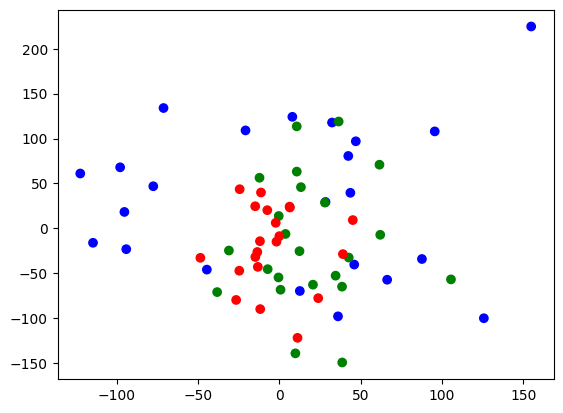

In [ ]:
plt.scatter(aparc_corZ_pca[0,:], aparc_corZ_pca[:,1], c = colors)
plt.show


In [ ]:
  labels = data['group'].to_numpy()
  samples = aparc_corZ_pca



  # set up cross validation classification
  numSplits = 3
  CVfolds = GroupKFold(n_splits=numSplits)
  clf = make_pipeline(svm.SVC(kernel='linear'))

  # run permutation analysis
  random.seed(77777)
  score,permutation_scores,pvalue = permutation_test_score(estimator = clf,
                                                           X = samples, 
                                                           y = labels,
                                                           groups = labels,
                                                           scoring='accuracy',
                                                           cv = CVfolds, 
                                                           n_permutations=100,
                                                           n_jobs = 4)
  
    
  print("Classification score %1.3f (pvalue : %1.3g)" % (score, pvalue))

Classification score 0.000 (pvalue : 1)
